In [57]:
import matplotlib.pyplot as plt
import ase
from ase import io
from ase.visualize import view

In [37]:

"""
Generate ZOrder Curve
"""
# from pyzorder import ZOrderIndexer
# import numpy as np

# zi = ZOrderIndexer((0, 60), (0, 60))

# z_2_2 = zi.zindex(2, 2)
# # z_2_2 = 12

# zi.next_zorder_index(z_2_2)
# # return 13

# zi.next_zorder_index(15)

# order = []
# order_2d = []
# order_dih = []
# dih1, dih2 = (np.arange(0, 355.0, 6) + 165), (np.arange(0, 355.0, 6) - 162)

# for i in range(60):
#     for j in range(60):
#         #print(
#             #i, j, ":", zi.zindex(i, j)
#         #)  # , "--" , zi.next_zorder_index(i), zi.next_zorder_index(j))
#         order_dih.append([dih1[i], dih2[j]])
#         order_2d.append([i, j])
#         #print(zi.zindex(i,j))
#         order.append(zi.zindex(i, j))
# ordered_order_dih = [_[0] for _ in sorted(zip(order_dih, order), key=lambda x: x[1])]
# ordered_order_dih = np.array(ordered_order_dih)

# for i in range(len(order)):
#     print(order[i])

'\nGenerate ZOrder Curve\n'

In [38]:
"""
generate one xyz file from all xyz files. New file is easier to open in vmd
"""

# from pathlib import Path

# with open(
#     f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/test_orca_xyz_output_ordered.xyz",
#     "a",
    
# ) as t:
#     for i in range(3600):
#         with open(
#             f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/orca/dih2dscan-{i}.inp.xyz/pbe0/def2svp/dih_scani.xyz",
#             "r",
#         ) as f:
#             t.write(f.read())

'\ngenerate one xyz file from all xyz files. New file is easier to open in vmd\n'

In [201]:


gnorms, energies = [], []
all_atoms = []
phis, psis = [], []
names = []

for i in range(3600):
    fn = f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/orca/dih2dscan-{i}.inp.xyz/pbe0/def2svp/dih_scani.xyz"
    
    names.append(i)
    
    with open(
        fn,
        "r"
    ) as f:
        _, _, _, _, _, energy = f.read().split("\n")[1].split()
        energies.append(float(energy))

    atoms = io.read(fn)
    
    phi, psi = (
        atoms.get_dihedral(31, 17, 14, 12, mic=False), # % 180 - 180,
        atoms.get_dihedral(17, 14, 12, 7, mic=False), # % 180 - 180,
    )

    if 0 > phi > 180:
        pass
    else:
        phi = phi - 360

    if 0 > psi > 180:
        pass
    else:
        psi = psi - 360
    
    all_atoms.append(atoms)
    phis.append(phi)
    psis.append(psi)

#gnorms = np.array(gnorms)
# _ = plt.hist(gnorms, bins=100)

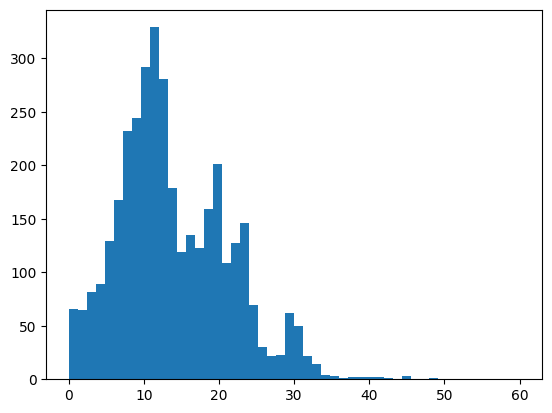

In [202]:
energies = np.array(energies)

energies_min_shift = energies - min(energies)

_ = plt.hist(energies_min_shift * 627, bins=50, range=(0, 60))
plt.show()

In [203]:
import polars as pl
VMAX = 12
df = pl.DataFrame({"name": names, "energies_min_shift": energies_min_shift * 627, "psi": np.array(phis), "phi": np.array(psis)})
df = df.filter(pl.col("energies_min_shift") < VMAX)

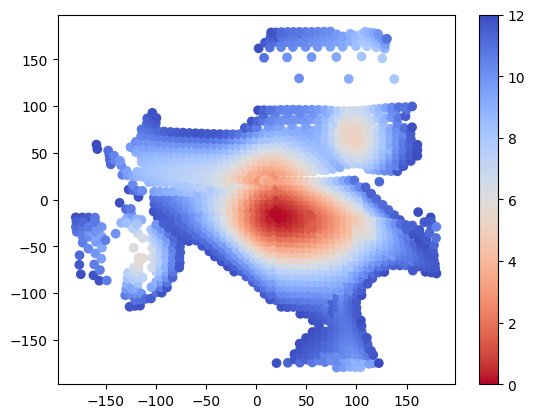

In [200]:
s = plt.scatter((df["phi"] % 360) - 180 , (df["psi"] % 360) - 180, c=df["energies_min_shift"], vmin=0, vmax=VMAX, cmap=cm.coolwarm_r)
plt.colorbar(s)
# plt.xlim(-180, 180)
# plt.ylim(-180, 180)

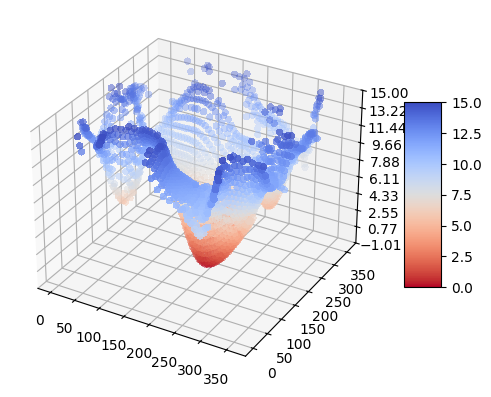

In [186]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y, Z = df["phi"], df["psi"], df["energies_min_shift"]
# Plot the surface.
surf = ax.scatter(X, Y, Z, cmap=cm.coolwarm_r, c=Z,
                       linewidth=0, antialiased=False, vmin=0, vmax=VMAX)

# Customize the z axis.
ax.set_zlim(-1.01, VMAX)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

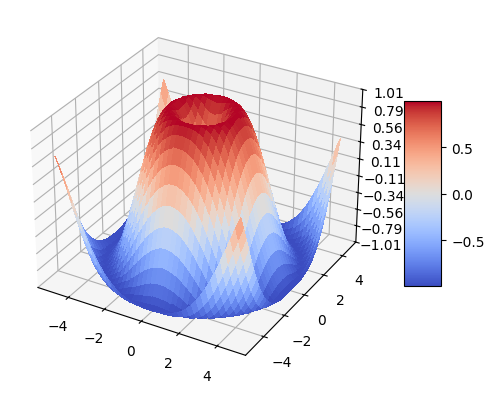

In [119]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [213]:
ndf = df.sort("energies_min_shift")
ndf


name,energies_min_shift,psi,phi
i64,f64,f64,f64
1,0.0,-195.439636,-156.579623
7,0.060712,-195.540076,-150.849716
1350,0.06419,-200.227193,-156.413624
3599,0.072916,-194.920409,-162.163167
2,0.081081,-190.774902,-156.322849
…,…,…,…
1072,11.95727,-334.407089,-136.552582
1826,11.960609,-257.444829,-11.153495
647,11.963748,-199.193449,-5.961614


In [215]:
indexes = []
for i in ndf["name"]:
    indexes.append(i)

len(indexes)

1696

In [227]:
"""
Generates a file "indexes" which holds the 1696 indexes in the above list
"""

# with open("/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/indexes2", "w") as f:
#     for i in indexes:
#         f.writelines(f"{str(i)} ")

In [218]:

for index in indexes:
    opath = f"/cluster/home/schmidtn/master/wahlprak/dftmp2bench/data/xyzs/dih2dscan-{index}.inp.xyz"
    gpath = f"/cluster/home/schmidtn/master/wahlprak/dftmp2bench/data/xyzs2/dih2dscan-{index}.inp.xyz"
    
    with open(opath, "r") as f:
        content = f.read()
    with open(gpath, "w") as t:    
        t.write(content)